# Winter 2022 Data Science Intern Challenge


## Question 1
>On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


 


In [1]:
import numpy as np 
import pandas as pd 


df = pd.read_csv(r"C:\Users\mensa\OneDrive\Desktop\SHOPIFY\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [2]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


We can see there are no missing values.

In [4]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The Average Order Value (AOV) is the mean of the column "order_amount"
This may be particularly so because of high values of order amounts.
The data also tells us that the standard deviation of 41282.54 is particularly large.
This shows that on average, the values vary by 41,282.54 from the mean.
It is not advisable to use the mean as the AOV.
What is interesting is that the dataset has only 5000 records, yet the mean is incredibly high. This shows there may be outliers in the data.



<AxesSubplot:>

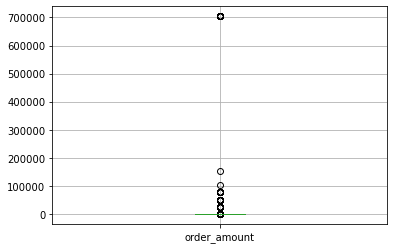

In [5]:
df.boxplot(column='order_amount')

The figure shows there are lots of outliers in the data.

Let us group the data by order amount, counting the number of entries for each group, and sort it in descending order.

In [6]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(20)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Some high order amounts are repeating themselves:704000, 51450, 25725

We should view those rows in our dataset

In [7]:
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


Order amounts for 704000, 51450, 25725 occur at the same time each day respectively.
Total items for order amount 704000 has been 2000 consistently. Total items for order amount 514450 has been 2 consistently whereas total items for order amount 25725 has been 1 consistently. The data also shows that order amount 704000 came from shop ID 42, whereas order amounts 514450 and 25725 came from shop ID 78.




Let us evaluate this data better. We will plot only values that are the median +/- 1.5 times the interquartile range.

<AxesSubplot:>

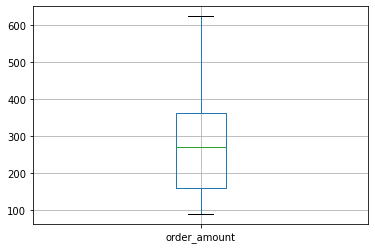

In [8]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_reworked = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_reworked.boxplot(column='order_amount')

Using `df_reworked` should provide a more accurate representation of the typical order data.

**b. What metric would you report for this dataset? **


Figure above shows that the distribution is skewed towards lower values. It is better to use the median value in the reworked dataset



**c. What is its value?**

We can find this value using the `describe()` function to find that it $272. It also shows that the standard deviation is 132.06, a much more reasonable result!

In [9]:
df_reworked.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

## Question 2
> For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below

**a. How many orders were shipped by Speedy Express in total?**

If we join the `[Orders]` and `[Shippers]` tables on `ShipperID`, we can filter table by orders performed by `Speedy Express` and count the entries. 

```
SELECT COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Shippers]
	ON [Shippers].ShipperID = [Orders].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'
```

Using the above query, the output shows the number of orders is **54**.

**b. What is the last name of the employee with the most orders?**

To solve this problem, we need to count the number of orders associated with each employee, see which one has the most orders, and report back their last name.

With SQL, we could count the number of orders in `[Orders]` and group by `EmployeeID`. This would give us which employee ID has the most orders, but not that employee's last name. Instead, we can use the `JOIN` expression to merge the `[Orders]` table and the `[Employees]` to match the employees to their employee ID and group by their last name to solve the problem.


```
SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
ORDER BY NumberOfOrders DESC
LIMIT 1
```

Using the query above shows that the employee with the last name **Peacock** had the most orders at **40**.

**c. What product was ordered the most by customers in Germany?**

The data we need to solve this problem is scattered across a few different tables. Our final query should show a list of products ordered by customers in Germay and how many orders of that product there were.

We can break down the problem into smaller sections and tackle them one at a time. First, let's look at *all orders from Germany*.

```
SELECT [Orders].OrderID,
	[Customers].Country
FROM [Orders]
JOIN [Customers]
	ON [Customers].CustomerID = [Orders].CustomerID
WHERE [Customers].Country = 'Germany'
```
This gives us a list of all orders to customers in Germany.

The next part of the problem is figuring out *which item was ordered the most*. We need to incorporate information such as product ID and quantity from the `[OrderDetails]` table to do this. By joining `[OrderDetails]` through the `OrderID` column, we can find the total quantity for each product by summing the quantity column and grouping by product id. 

```
SELECT [Customers].Country,
	[OrderDetails].ProductID,
    SUM([OrderDetails].Quantity) AS "TotalOrdered"
FROM [Orders]
JOIN [Customers]
	ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
	ON [OrderDetails].OrderID = [Orders].OrderID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrdered DESC -- Show most ordered item at the top.
```

At this point, we can see the most ordered item has a product ID of 40 at 160 orders. To make sense of this result, we can join the `[Products]` table on the `ProductID` column to get the name of the most ordered product.

```
SELECT [Products].ProductName,
    SUM([OrderDetails].Quantity) AS "TotalOrdered"
FROM [Orders]
JOIN [Customers]
	ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
	ON [OrderDetails].OrderID = [Orders].OrderID
JOIN [Products]
	ON [Products].ProductID = [OrderDetails].ProductID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrdered DESC -- Show most ordered item at the top.
```

This final query shows that **Boston Crab Meat** has the most orders at **160 total orders**.


https://www.linkedin.com/in/david-mensah-gbekor/